In [43]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [20]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [2]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [24]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [139]:
# reflect an existing database into a new model
# Reflect the tables
Base = automap_base()

Base.prepare(autoload_with= engine)


In [142]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [143]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [144]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [145]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurement.date)).all()
most_recent_date

[('2017-08-23',)]

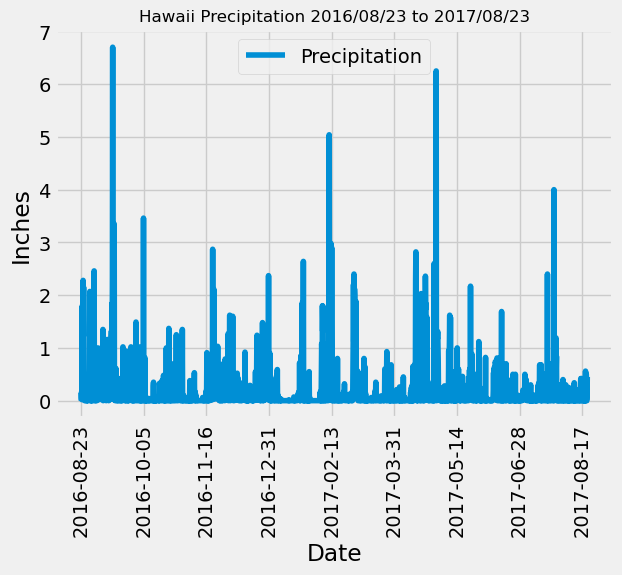

In [155]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precipitation_data = (
    session.query(Measurement.date, Measurement.prcp)
    .filter(Measurement.date >= one_year_ago)
    .order_by(Measurement.date)
    .all()
)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_df = pd.DataFrame(precipitation_data, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
precip_df.set_index(precip_df['Date'], inplace =True)
precip_df = precip_df.dropna()

# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot('Date', 'Precipitation')
plt.xlabel("Date")
plt.ylabel("Inches")
plt.title("Hawaii Precipitation 2016/08/23 to 2017/08/23", size = 12)
plt.xticks(rotation=90)
plt.legend(['Precipitation'], loc='upper center')

plt.show()

In [148]:
# Use Pandas to calculate the summary statistics for the precipitation data

summary_stats = precip_df['Precipitation'].describe()
summary_stats_df = summary_stats.to_frame()
summary_stats_df.columns = ['Value']
summary_stats_df

,Value
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [149]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(Station.station)).all()
total_stations

[(9,)]

In [150]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = (
    session.query(
        Measurement.station,
        func.count(Measurement.date).label('count')
    )
    .group_by(Measurement.station)
    .order_by(func.count(Measurement.date).desc())
    .all()
)

active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [151]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station_id = 'USC00519281'

temperature_stats = session.query(
    func.min(Measurement.tobs).label('min_temp'),
    func.max(Measurement.tobs).label('max_temp'),
    func.avg(Measurement.tobs).label('avg_temp')
).filter(Measurement.station == most_active_station_id).all()

temperature_stats

[(54.0, 85.0, 71.66378066378067)]

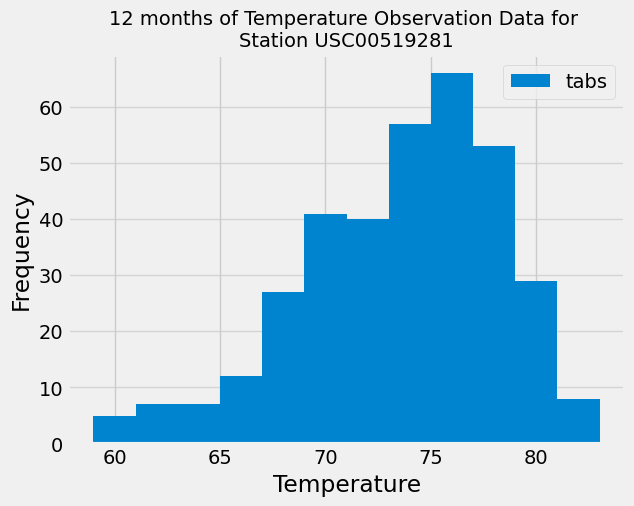

In [153]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temperature_data = session.query(Measurement.tobs).\
    filter(Measurement.station == most_active_station_id).\
    filter(Measurement.date >= one_year_ago).\
    order_by(Measurement.date).all()

temperature_df = pd.DataFrame(temperature_data, columns=['Temperature'])

plt.hist(temperature_df['Temperature'], bins=12, color="#0084cf",)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title("12 months of Temperature Observation Data for \nStation USC00519281", size=14)
plt.grid(axis='y', alpha=0.75)
plt.legend(['tabs'], loc='upper right')
plt.show()


# Close Session

In [16]:
# Close Session
session.close()